## EDA Project Sugarcane

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\full machine learning\extras, datasets, etc\List of Countries by Sugarcane Production.csv")
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [4]:
df.shape

(103, 7)

### Data Cleaning

In [5]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".", "")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(",", "")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".", "")
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].str.replace(",","")
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3.668531,10226205,75.1675
1,1,India,Asia,348448000,260721,4950000,70.3935
2,2,China,Asia,123059739,88287,1675215,73.4591
3,3,Thailand,Asia,87468496,1.264303,1336575,65.4422
4,4,Pakistan,Asia,65450704,324219,1130820,57.879


In [6]:
df.isna().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

In [7]:
#we check the null values in Acreage(Hectare)
df[df["Acreage (Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [8]:
df = df.dropna() #removes rows will null values

In [9]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3.668531,10226205,75.1675
1,1,India,Asia,348448000,260721,4950000,70.3935
2,2,China,Asia,123059739,88287,1675215,73.4591
3,3,Thailand,Asia,87468496,1.264303,1336575,65.4422
4,4,Pakistan,Asia,65450704,324219,1130820,57.879


### Converting DataTypes

In [10]:
df.dtypes

Unnamed: 0                     int64
Country                       object
Continent                     object
Production (Tons)             object
Production per Person (Kg)    object
Acreage (Hectare)             object
Yield (Kg / Hectare)          object
dtype: object

In [11]:
# converting into float
df["Production (Tons)"] = df["Production (Tons)"].astype(float)
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].astype(float)
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].astype(float)
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].astype(float)

In [12]:
df.dtypes

Unnamed: 0                      int64
Country                        object
Continent                      object
Production (Tons)             float64
Production per Person (Kg)    float64
Acreage (Hectare)             float64
Yield (Kg / Hectare)          float64
dtype: object

In [13]:
df.nunique()

Unnamed: 0                    102
Country                       102
Continent                       6
Production (Tons)             102
Production per Person (Kg)    101
Acreage (Hectare)             101
Yield (Kg / Hectare)          102
dtype: int64

## Univariate Analysis

In [14]:
# how many countries produce sugrcane from each continent
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

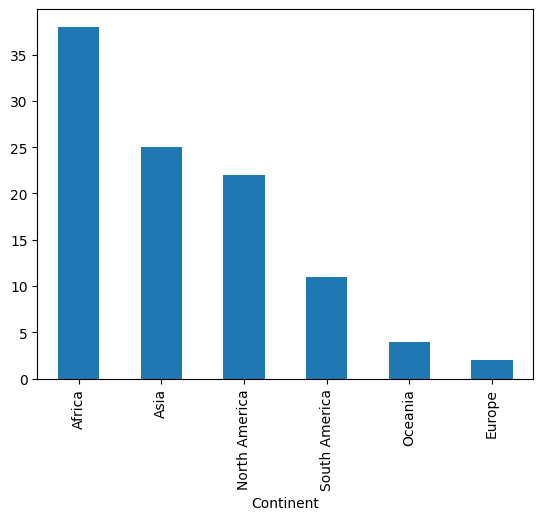

In [15]:
df["Continent"].value_counts().plot(kind="bar") # in the form of bar graph

## Making plot

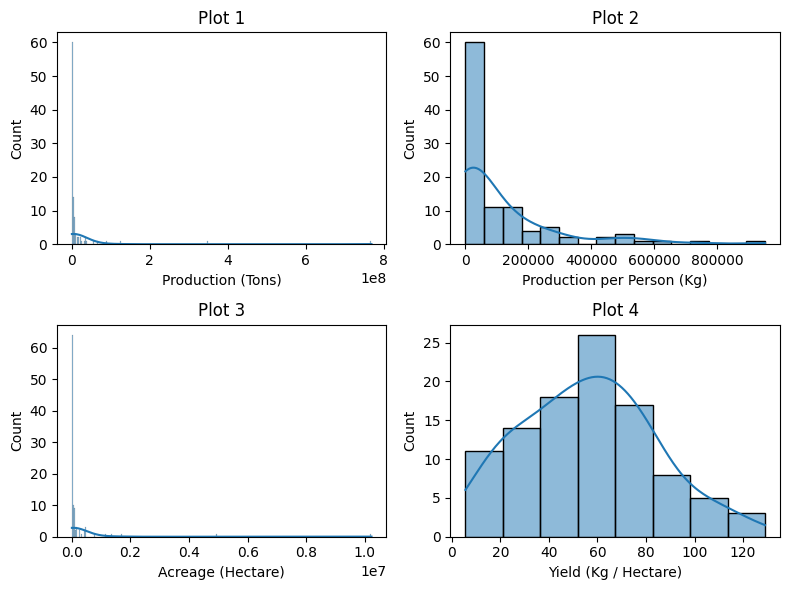

In [16]:
plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['Production (Tons)'], kde=True)
plt.title('Plot 1')

plt.subplot(2, 2, 2)
sns.histplot(df['Production per Person (Kg)'], kde=True)
plt.title('Plot 2')

plt.subplot(2, 2, 3)
sns.histplot(df['Acreage (Hectare)'], kde=True)
plt.title('Plot 3')

plt.subplot(2, 2, 4)
sns.histplot(df['Yield (Kg / Hectare)'], kde=True)
plt.title('Plot 4')

plt.tight_layout()
plt.show()

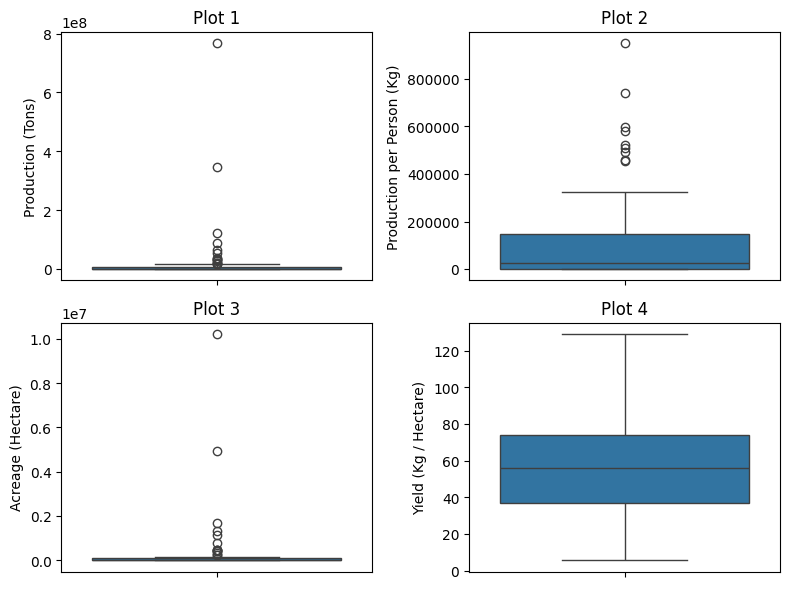

In [17]:
# box plot for seeing the outliers
plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
sns.boxplot(df['Production (Tons)'])
plt.title('Plot 1')

plt.subplot(2, 2, 2)
sns.boxplot(df['Production per Person (Kg)'])
plt.title('Plot 2')

plt.subplot(2, 2, 3)
sns.boxplot(df['Acreage (Hectare)'])
plt.title('Plot 3')

plt.subplot(2, 2, 4)
sns.boxplot(df['Yield (Kg / Hectare)'])
plt.title('Plot 4')
#we can see that the plot 4 has no outliers

plt.tight_layout()
plt.show()

### Bivariate Analysis

In [18]:
df.describe()

,Unnamed: 0,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
count,102.000000,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,50.529412,1.850372e+07,112652.907671,2.498981e+05,56.190931
std,29.638985,8.419149e+07,176841.911118,1.137003e+06,27.569322
min,0.000000,1.000000e+00,0.000000,0.000000e+00,5.577800
25%,25.250000,6.251875e+04,1304.000000,1.104000e+03,36.809325
50%,50.500000,1.440044e+06,25572.500000,1.655800e+04,55.679950
75%,75.750000,6.426824e+06,146384.750000,8.047400e+04,73.706675
max,102.000000,7.686784e+08,951087.000000,1.022620e+07,129.049300


In [19]:
# which country has highest production
df_new = df[["Production (Tons)", "Country"]].set_index("Country") #set index means, Country will be treated as our index
df_new

,Production (Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [20]:
df_new["Production (Tons) Percentage"] = df_new["Production (Tons)"] * 100 / df_new["Production (Tons)"].sum()
df_new

,Production (Tons),Production (Tons) Percentage
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production (Tons) Percentage'>

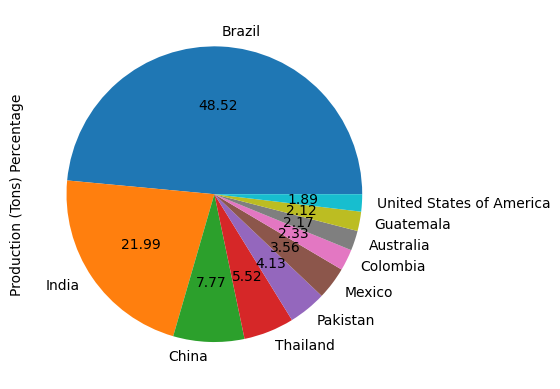

In [21]:
# we now plot a pie hart to see the distribution in percentage
df_new["Production (Tons) Percentage"].head(10).plot(kind="pie", autopct = "%.2f") # only gives us chart of top 10

C:\Users\ANIRUDH\AppData\Local\Temp\ipykernel_14860\1096315180.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90) #ax.get_xticklabels() → Get all the x-axis labels (country names). Rotation rotates the name


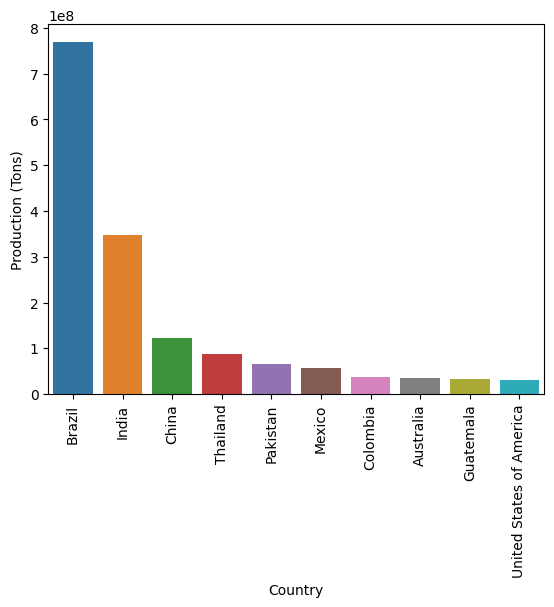

In [22]:
# create a barplot and storing in the variable
ax = sns.barplot(data = df.head(10), x = "Country", y = "Production (Tons)", hue="Country") #hue gives diff colors
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90) #ax.get_xticklabels() → Get all the x-axis labels (country names). Rotation rotates the name
plt.show()

### Which country has highest land

C:\Users\ANIRUDH\AppData\Local\Temp\ipykernel_14860\2335221808.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


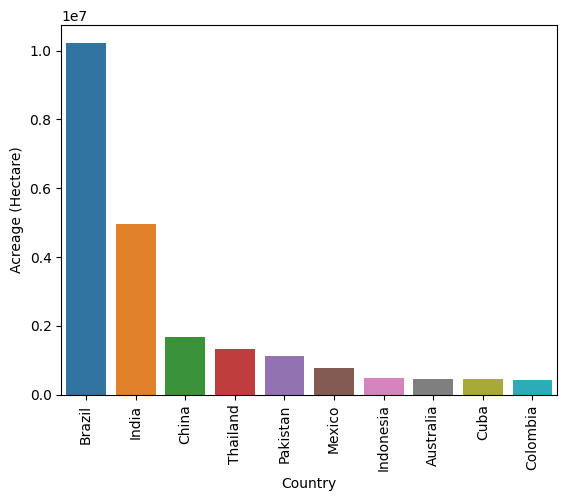

In [23]:
df_acr = df.sort_values("Acreage (Hectare)", ascending= False) # this line sorts values and then displays, in accordance with Acreage 
ax = sns.barplot(data = df_acr.head(10), x = "Country", y = "Acreage (Hectare)", hue= "Country")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

### Which country has highest yeild per hecreage

C:\Users\ANIRUDH\AppData\Local\Temp\ipykernel_14860\2874748460.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


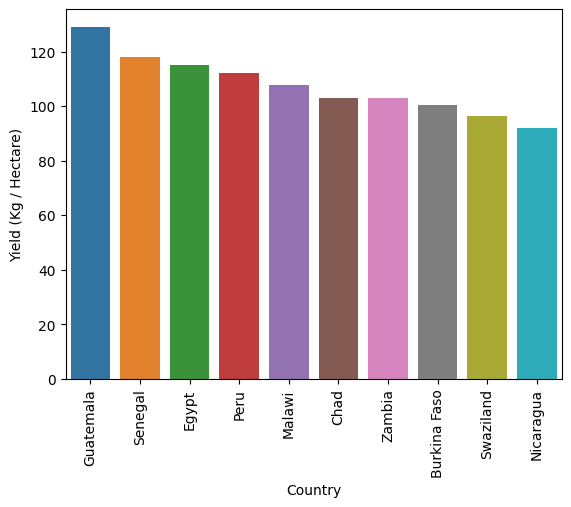

In [24]:
df_y = df.sort_values("Yield (Kg / Hectare)", ascending= False) # this line sorts values and then displays, in accordance with Yeild
ax = sns.barplot(data = df_y.head(10), x = "Country", y = "Yield (Kg / Hectare)", hue= "Country")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

## Corelation

In [25]:
df_corr = df.select_dtypes(include=['number']).corr() # selects only data that is numeric for correlation
df_corr = df_corr.drop("Unnamed: 0", axis=1)  # Drop from columns
df_corr = df_corr.drop("Unnamed: 0", axis=0)  # Drop from rows
df_corr # correlation between rows and columns

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
Production (Tons),1.000000,0.013271,0.997550,0.136476
Production per Person (Kg),0.013271,1.000000,0.010880,0.185890
Acreage (Hectare),0.997550,0.010880,1.000000,0.112999
Yield (Kg / Hectare),0.136476,0.185890,0.112999,1.000000


<Axes: >

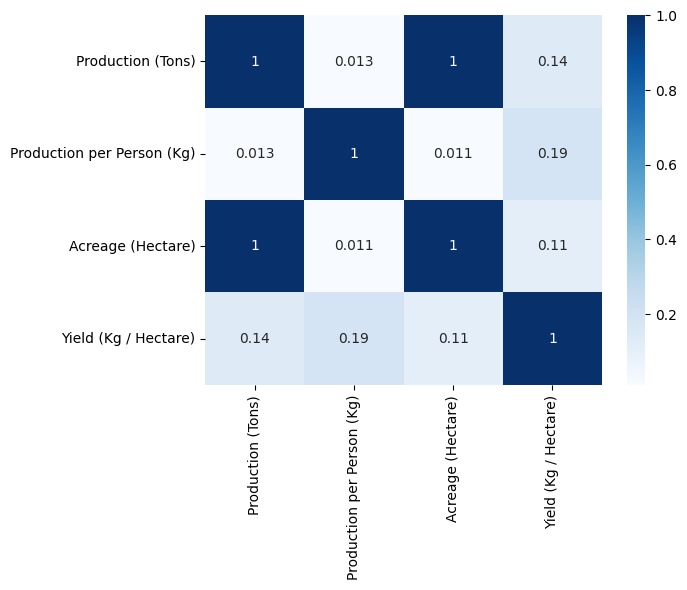

In [26]:
# lets see the heatmap for this correlation
sns.heatmap(df_corr, annot= True, cmap="Blues") # in the annot writes the numeroc value Boxes

### Do countries with more land produce more sugarcane ?

<Axes: xlabel='Acreage (Hectare)', ylabel='Production (Tons)'>

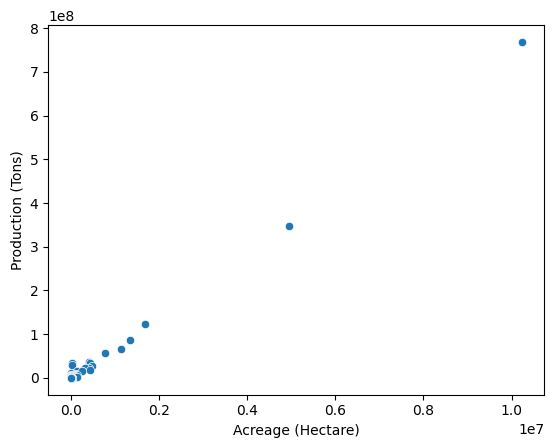

In [27]:
sns.scatterplot(data= df, x = "Acreage (Hectare)", y="Production (Tons)") #yes

## Which Continent produces more sugarcane

In [28]:
df_con = df.groupby("Continent").sum().drop("Unnamed: 0", axis=1)
df_con

,Country,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2.324825e+06,1439089.0,2142.1075
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1.856506e+06,10608319.0,1226.8164
Europe,PortugalSpain,5823.0,5.360000e+02,71.0,131.8709
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3.784457e+06,1581983.0,1335.7274
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,2.546413e+04,490909.0,162.4191
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3.498809e+06,11369236.0,732.5337


<Axes: xlabel='Continent'>

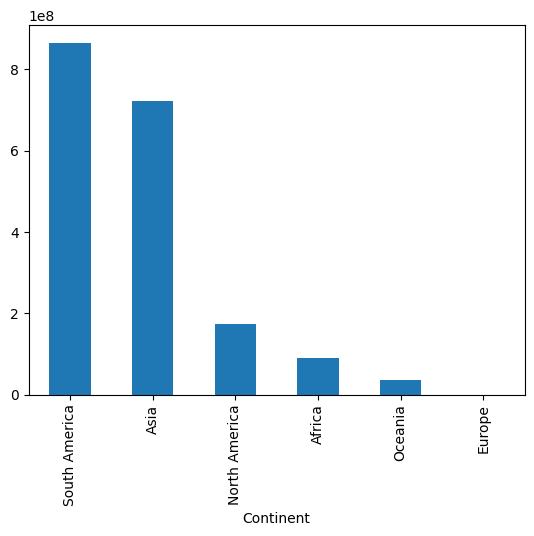

In [29]:
df_con["Production (Tons)"].sort_values(ascending= False).plot(kind="bar")

<Axes: xlabel='Continent'>

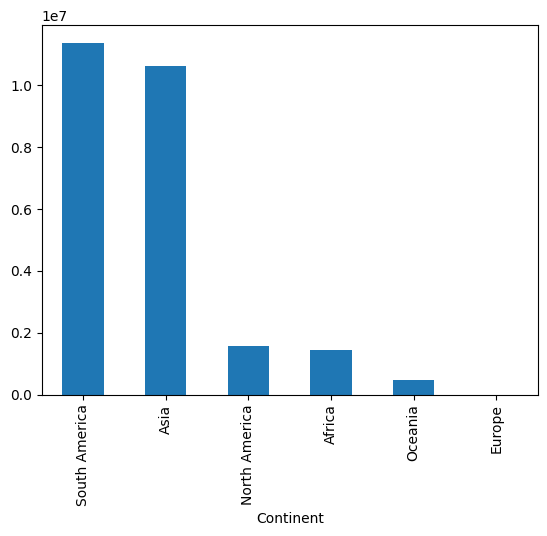

In [30]:
df_con["Acreage (Hectare)"].sort_values(ascending= False).plot(kind="bar") # based on land area

In [31]:
#how many countries are there in each continent
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

## Do number of countries in a continent affect production of sugarcane

In [32]:
# first lets add a column named number of countries
df_con["Country_Number"] = df.groupby("Continent").count()["Country"]
df_con

,Country,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare),Country_Number
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2.324825e+06,1439089.0,2142.1075,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1.856506e+06,10608319.0,1226.8164,25
Europe,PortugalSpain,5823.0,5.360000e+02,71.0,131.8709,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3.784457e+06,1581983.0,1335.7274,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,2.546413e+04,490909.0,162.4191,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3.498809e+06,11369236.0,732.5337,11


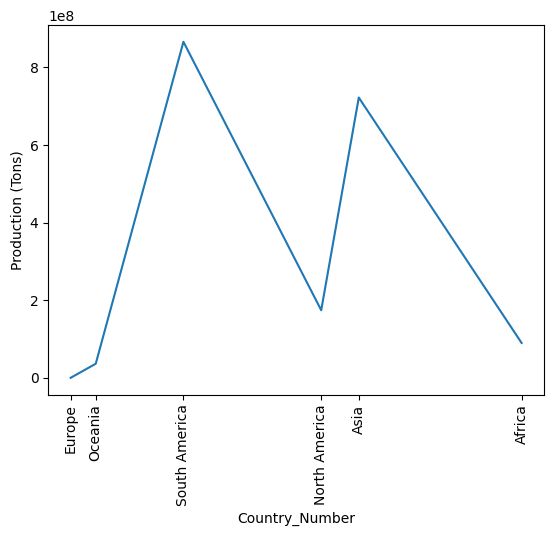

In [33]:
# now lets plot it
continent_names = df_con.index.to_list()
sns.lineplot(data= df_con, x = "Country_Number", y= "Production (Tons)")
plt.xticks(df_con["Country_Number"], continent_names, rotation = 90)
plt.show()

### Distribution by Continent

<Axes: ylabel='Production (Tons)'>

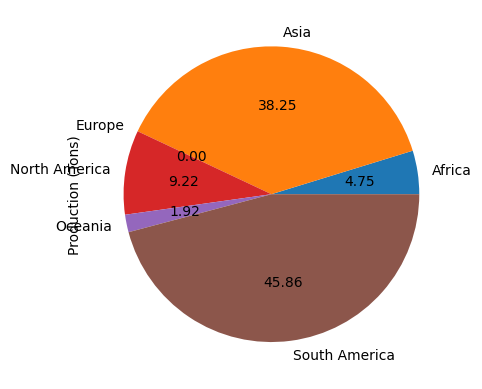

In [34]:
df_con["Production (Tons)"].plot(kind= "pie", autopct = "%.2f")

In [35]:
df_con.corr

<bound method DataFrame.corr of                                                          Country  \
Continent                                                          
Africa         EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...   
Asia           IndiaChinaThailandPakistanIndonesiaPhilippines...   
Europe                                             PortugalSpain   
North America  MexicoGuatemalaUnited States of AmericaCubaEl ...   
Oceania                       AustraliaFijiPapua New GuineaSamoa   
South America  BrazilColombiaArgentinaPeruEcuadorBoliviaParag...   

               Production (Tons)  Production per Person (Kg)  \
Continent                                                      
Africa                89681472.0                2.324825e+06   
Asia                 721930425.0                1.856506e+06   
Europe                    5823.0                5.360000e+02   
North America        173995947.0                3.784457e+06   
Oceania               36177574.0       